#  Лабораторная работа №1 «Дискретизация аналоговых сигналов»



# Занятие 1. Классификация сигналов: аналоговые, дискретные, цифровые.

In [1]:
import numpy as np                # импорт бибилиотеки numpy
import matplotlib.pyplot as plt   # импорт модуля matplotlib.pyplot
import scipy.io.wavfile # импорт модуля scipy.io.wavfile

In [2]:
def quantize_uniform(x, quant_min=-1, quant_max=1, quant_level=5):
    """Uniform quantization approach
    From: Müller M. Fundamentals of music processing: Audio, analysis, algorithms, applications. – Springer, 2015.
    Notebook: C2S2_DigitalSignalQuantization.ipynb
    Args:
        x: Original signal
        quant_min: Minimum quantization level
        quant_max: Maximum quantization level
        quant_level: Number of quantization levels
    Returns:
        x_quant: Quantized signal
    """
    x_normalize = (x-quant_min) * (quant_level-1) / (quant_max-quant_min)
    x_normalize[x_normalize > quant_level - 1] = quant_level - 1
    x_normalize[x_normalize < 0] = 0
    x_normalize_quant = np.around(x_normalize)
    x_quant = (x_normalize_quant) * (quant_max-quant_min) / (quant_level-1) + quant_min
    return x_quant

In [3]:
import scipy.integrate as integrate # импорт модуля численного интегрирования
def integrate_function(t, func, f, tau, real_part=True):
    # Подынтегральное выражение для использованиия в функции integrate.quad
    # t - время
    # func - функция, задающая импульс
    # f - частота
    # tau - константа, используемая для задания длительности импульса
    if real_part:
        return func(t, tau)*np.cos(-2*np.pi*f*t)  # действительная часть интеграла
    else:
        return func(t, tau)*np.sin(-2*np.pi*f*t)  # мнимая часть интеграла
def fourier_transform(signal, f_band, tau, t1, t2, res_type='abs'):
    # вычисление преобразования Фурье для набора частот
    # signal - функция от t и tau, задающая сигнал во временной области 
    # f_band - набор частот, для которых вычисляется преобразование Фурье
    # tau - константа, используемая для задания длительности импульса
    # t1 момент начала сигнала
    # t2 момент завершения сигнала
    # тип возвращаемого значения:
    # res_type='abs' - |X(f)|
    # res_type='Re' - Re X(f)
    # res_type='Im' - Im X(f)
    if res_type=="abs":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return abs(Re+1j*Im)
    elif res_type=="Re":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        return Re
    elif res_type=="Im":
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return Im

## Задача 0. Введение в Python 3. (Задание к допуску)

1) Подгрузить библиотеку *Numpy* (`import numpy as np`).

2) Создать массив от 1 до 10 с шагом 2 – [1, 3, 5, 7, 9] – тремя разными способами (используя  три разные функции `np.array()`, `np.arange()`, `np.linspace()`).

3) Создать массив целых чисел от 0 до 100 (размерностью 100 элементов) максимально короткой записью.

4) Создать массив `k`, такой же как описан в п.3. Используя его, создать массив (набор отсчетов) `x`, соответствующий формуле $x[k] = \sin(2\pi \dfrac{f_0}{f_s}k)$, где $\dfrac{f_0}{f_s}$ взять равным 0.07. Следует использовать функцию `np.sin()` и константу `np.pi`.

5) Подгрузить модуль *pyplot* библиотеки *Matplotlib* (`import matplotlib.pyplot as plt`).

6) Создать холст (другие названия полотно, канва) размером 12 на 5 дюйма (`figsize = [12, 5]`).

7) Построить график $x[k]$ (`plt.plot(k, x)`), сделать подписи осей и заголовок графика.

8) Поменять цвет линии графика из п.7 на красный или оранжевый и тип линии на пунктир. Построить на графике отсчеты $x[k]$ с помощью функции `plt.stem(k, x)`, см. Задача 1.1 и Задача 1.2.  
(Для того чтобы поменять тип линии на пунктир, нужно в параметре отвечающем за цвет поставить модификатор "--", например `'--b'`.)

9) Работа с функциями.
  1. Создать функцию, соответствующую формуле $\dfrac{\sin(x)}{x}$. `def my_fun(x):`
  2. Незабыть обработать неопределенность в 0.  
  `if x=0:`  
  ....`return 1`  
  `else`  
  ....`return np.sin(x)/x`
  3. Выполнить п.4 и п.7, создав новый массив значений `y`, используя созданную вами функцию.

10)  Выполнить п.4, только для массива `z`, который соответствует комплексной экспоненциальной функции $z[k] = \exp(-j\,2\pi\,\dfrac{f_0}{f_s}k)$  (функция `np.exp()`). Выполнить п.7, но построить отдельно график реальной и график мнимой частей этой функции.

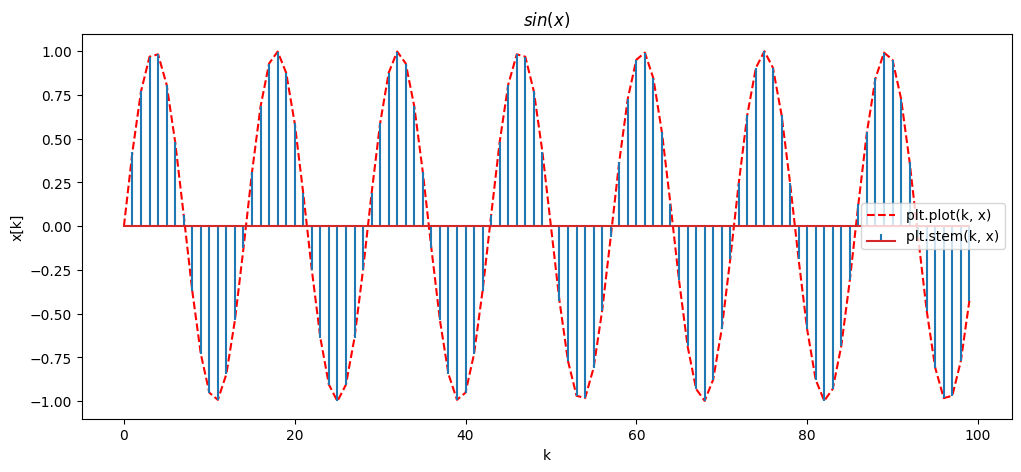

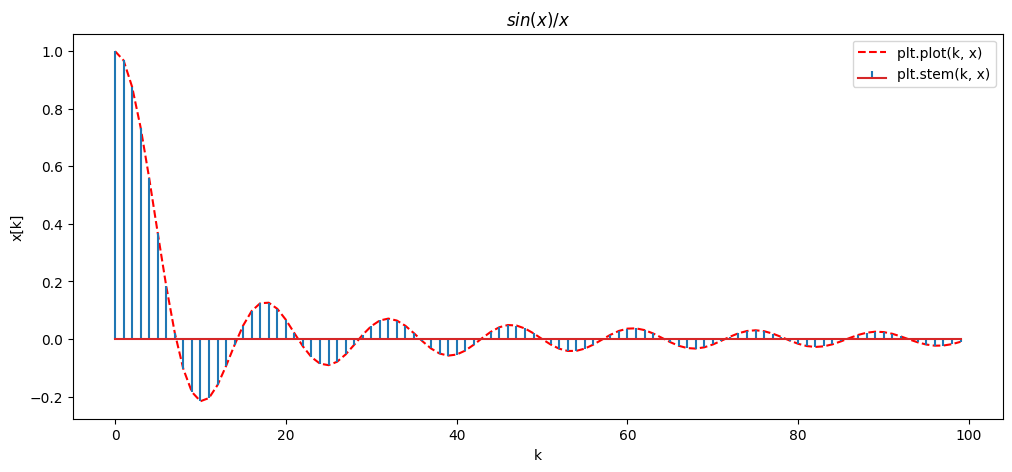

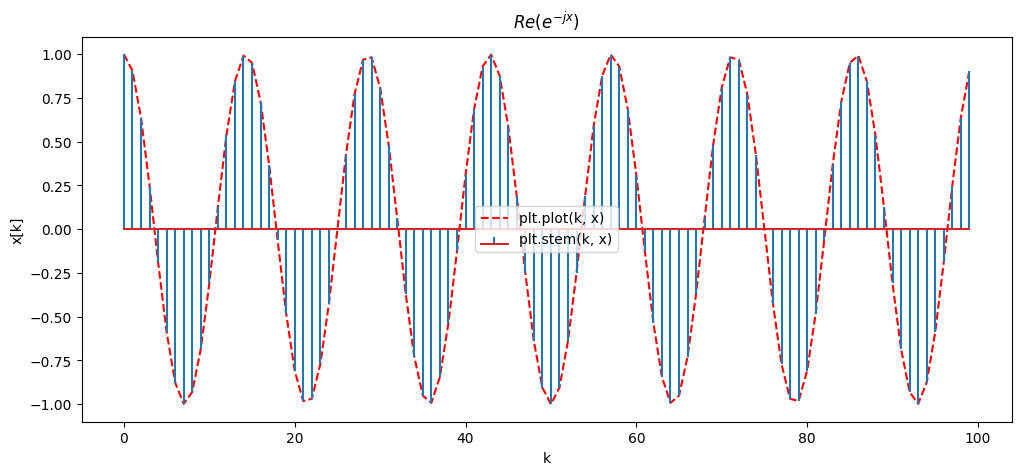

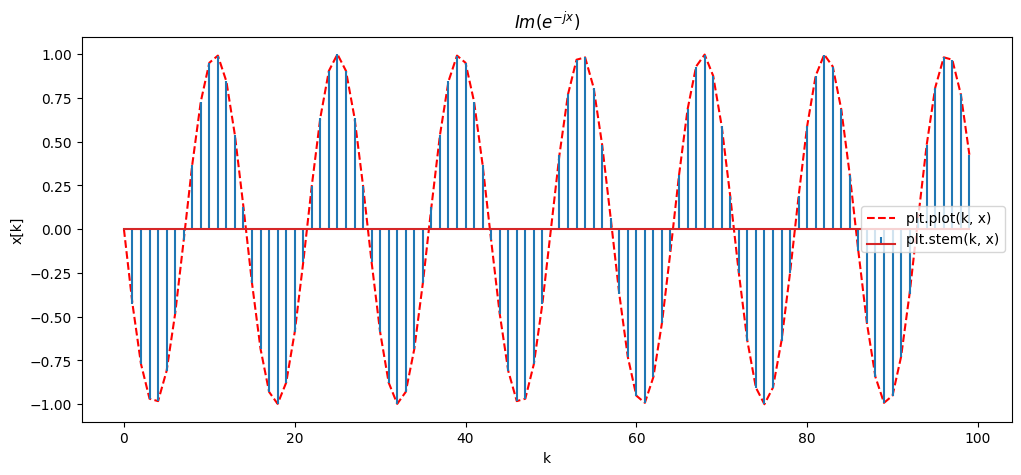

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1
x1 = np.array(list(range(1, 10, 2)))
x2 = np.arange(1, 10, 2)
x3 = np.linspace(1, 9, 5)

def gen_data(foo):
    x = np.arange(100)

    k = np.arange(100)
    scale = .07
    x = foo(2 * np.pi * scale * k)

    return k, np.real(x), np.imag(x)

def plot(k, x, title):
    plt.figure(figsize=[12, 5])
    plt.plot(k, x, "r--", label="plt.plot(k, x)")
    plt.stem(k, x, label="plt.stem(k, x)", markerfmt="")

    plt.legend()
    plt.title(title)
    plt.xlabel("k")
    plt.ylabel("x[k]")
    plt.show()


def sinc(X):
    def fill(x):
        if x == 0: return 1
        return np.sin(x) / x

    return np.array([fill(x) for x in X])

def exp(X):
    return np.exp(-1j * X)

k, x, _ = gen_data(np.sin)
plot(k, x, "$sin(x)$")

k, x, _ = gen_data(sinc)
plot(k, x, "$sin(x)/x$")

k, re, im = gen_data(exp)
plot(k, re, "$Re(e^{-jx})$")
plot(k, im, "$Im(e^{-jx})$")


## Задача 1.1. Дискретизация и квантование.

| Варианты: |   1 |    2 |    3 |   4 |    5 |    6 |    7 |    8 |    9 |   10 |   11 |   12 |
|:---------:|----:|-----:|-----:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|     **N**     |  15 |   20 |   30 |  12 |   15 |   30 |   25 |   18 |   10 |   25 |   20 |   15 |
|   $f_0$**, Гц**   | 200 |  250 |  400 | 200 |  600 |  750 | 1200 |  600 |  400 |  500 |  800 |  400 |
|   $f_s$**, Гц**   | 500 | 1250 | 2000 | 600 | 1500 | 3750 | 6000 | 1800 | 1000 | 2500 | 4000 | 1200 |

Промоделировать дискретизацию и квантование синусоидального сигнала $x(t)=\sin(2\pi f_0 t)$ с частотой дискретизации $f_s$. Пронаблюдать эффекты во временной области для отрезка сигнала из $N$ отсчетов. 

1) Как соотносится растояние между отсчетами по оси времени с частотой дискретизации?
    $$\tau = 1 / f_s$$


2) Как изменяется максимально возможная абсолютная ошибка квантования $\varepsilon[k]=|x[k]-y[k]|$ с ростом числа уровней квантования?

    | N | 2 | 4 | 8 | 16 | 32 | 64 |
    |:-:|--:|--:|--:|---:|---:|---:|
    |$\varepsilon$| 1 | .33 | .14 | .066 | .032 | .016 |

    Абсолютная ошибка обратно пропорциональна числу уровней квантования

In [5]:
# Вариант 9

N=10                                    # Число отсчетов по времени
f0=400.0                                # Частота синусоиды в Гц
fs=1000.0                               # Частота дискретизации в Гц
k=np.arange(N)                          # Mассив времен k от 0 до N-1 с шагом 1
x=np.sin(2*np.pi*(f0/fs)*k)             # Последовательность x[k]
num_levels=8                      # число уровней квантования

C:\Users\Vladimir\AppData\Local\Temp\ipykernel_4356\2343685875.py:8: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(k/fs, x, linefmt='b', markerfmt='bo', use_line_collection=True, label='дискретизованный сигнал $x[k]$')


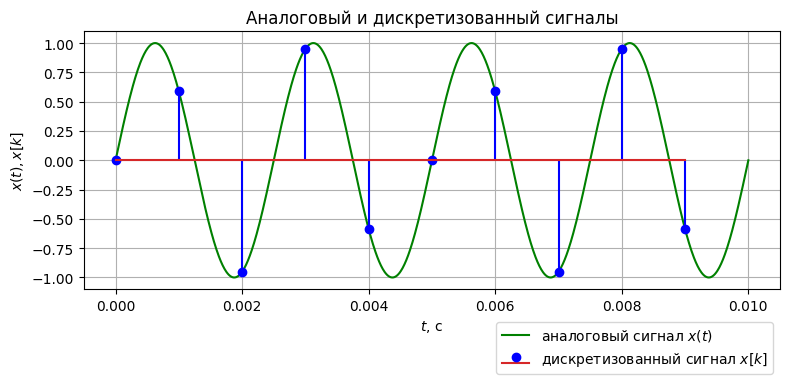

In [6]:
# Построение графиков аналогового и дискретизованного сигнала
plt.figure(figsize=[8, 4])              # создание полотна размером шириной 8 X 4 дюйма
t=np.linspace(0, N/fs, num=1024)        # создание массива времен t (1024 значения от 0 до N*fs)

plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')  
                                        # построение графика x(t) (точки соединяются линиями)
                                        # 'g' означает, что используется зеленая линия (green)
plt.stem(k/fs, x, linefmt='b', markerfmt='bo', use_line_collection=True, label='дискретизованный сигнал $x[k]$')            
                                        # построение графика функции дискретного времени x[k]
                                        # 'b', 'bo' означает, что отсчеты оборажаются синим цветом (blue)
plt.grid()                              # сетка
plt.xlabel("$t$, c")                    # подпись оси X
plt.ylabel("$x(t), x[k]$")              # подпись оси Y
plt.title("Аналоговый и дискретизованный сигналы") # заголовок графика
plt.legend(loc='best', bbox_to_anchor=(1, -0.1))
plt.tight_layout()                      # автоматическая корректировка расположения осей графика
plt.show()

In [7]:
# моделирование квантования дискретного сигнала
y=quantize_uniform(x, quant_min=-1, quant_max=1, quant_level=num_levels)
bins=np.linspace(-1, 1, num_levels)

C:\Users\Vladimir\AppData\Local\Temp\ipykernel_4356\3027071769.py:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(k/fs, y, linefmt='b', markerfmt='bo', use_line_collection=True, label='цифровой сигнал $y[k]$')


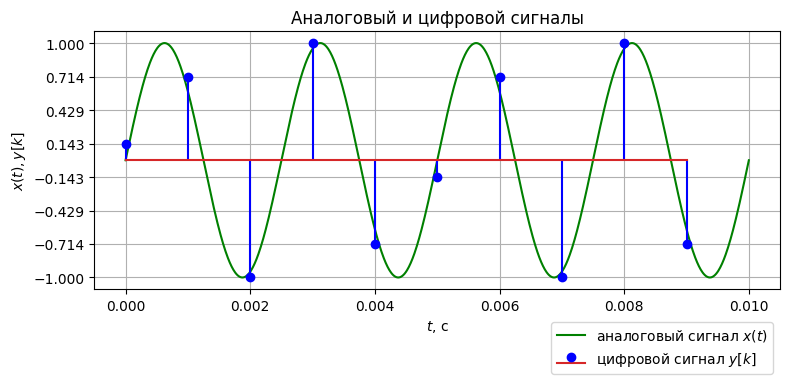

In [8]:
# Вывод графика аналогового и цифрового сигнала
plt.figure(figsize=[8, 4])                  # создание полотна размером шириной 8 X 4 дюйма
t=np.linspace(0, N/fs, num=1024)            # создание массива времен t (1024 значения от 0 до N*fs)
plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')        
                                            # построение графика x(t) (точки соединяются линиями)

plt.stem(k/fs, y, linefmt='b', markerfmt='bo', use_line_collection=True, label='цифровой сигнал $y[k]$')                
                                            # построение графика функции дискретного времени y[k]
                                            # k/fs - м
    
if num_levels<21:                           # если число уровней не велико, то производится
    plt.yticks(bins)                        # установка делений шкалы оси Y, совпадающих с уровнями квантования

plt.grid()                                  # сетка
plt.xlabel("$t$, c")                        # подпись оси X
plt.ylabel("$x(t), y[k]$")                  # подпись оси Y
plt.title("Аналоговый и цифровой сигналы")  # заголовок графика
plt.legend(loc='best', bbox_to_anchor=(1, -0.1))
plt.tight_layout()                          # автоматическая корректировка расположения осей графика

In [9]:
max(abs(x-y))

0.1428571428571428

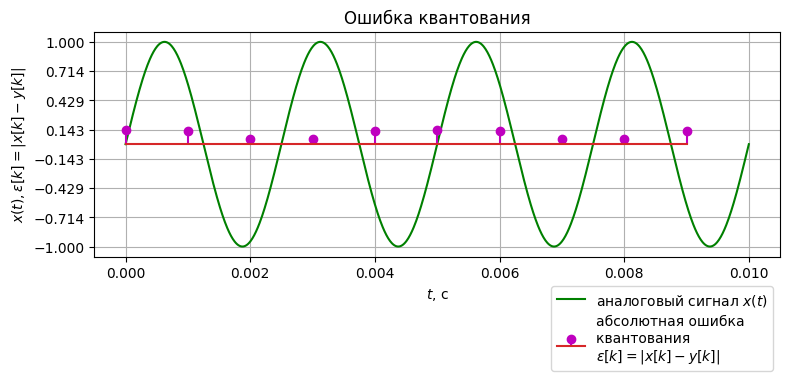

In [10]:
plt.figure(figsize=[8, 4])
plt.title("Ошибка квантования") 
plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')
plt.stem(k/fs, abs(x-y), linefmt='m', markerfmt='mo', label="абсолютная ошибка \nквантования \n$\\epsilon[k]=|x[k]-y[k]|$")       
                                      #вывод абсолютных значений ошибки квантования для дискретного сигнала
plt.yticks(bins)
plt.grid()
plt.xlabel("$t$, c")                                          # подпись оси X
plt.ylabel("$x(t), \\varepsilon[k]=|x[k]-y[k]|$")             # подпись оси Y
plt.legend(loc='best', bbox_to_anchor=(1, -0.1))
plt.tight_layout() 
plt.show()

## Задача 1.2. Декодирование .wav файла

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |         7        |       8      |        9       |     10    |        11       |     12     |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|:----------------:|:------------:|:--------------:|:---------:|:---------------:|:----------:|
| **Имя файла** | clarinet.wav | flute.wav | glockenspiel.wav | guitar.wav | tuning-fork.wav | vibraphone.wav | glockenspiel.wav | clarinet.wav | vibraphone.wav | flute.wav | tuning-fork.wav | guitar.wav |

Декодируйте .wav файл в соотвествии с Вашим вариантом из таблицы. 

1) Определите частоту дискретизации, битную глубину записи (соотвествует dtype) и соотвествующее ей колличество уровней квантования. 

2) Сравните растояние между отсчетами по оси времени на графике с частотой дискретизации.

3) Поменяйте ось времени (первый аргумент функции `plt.plot`) так, чтобы первому отсчету наблюдаемого диапазона соотвествовало время от начала файла.

4) Определите длину записи в секундах.

5) Оцените объем файла в килобайтах (КБ), при условии, что никакое дополнительное сжатие не производится (использовать данные о частоте дискретизации, числе отсчетов и битовой глубине). Сравние с реальным объемом файла. 

In [11]:
# Вариант 9
filename = 'vibraphone.wav'

from IPython.display import Audio
Audio(filename)

In [12]:
fs, x = scipy.io.wavfile.read(filename) # чтение аудиофайла 

In [13]:
srate = fs # Hz
ssize = x.dtype.itemsize # Bytes
snum = x.size

depth = 8 * ssize
nlevels = 2**(depth)
filesize_b = ssize * snum # bytes, srate size can't be determined through python
filesize_Kb = filesize_b // 1024 + bool(filesize_b % 1024)
wavtime = snum / srate

print("Tasks 1, 4, 5\n"
      f'Sample rate: {srate}Hz\n'
      f'Bit depth:   {depth}\n'
      f'Levels:      {nlevels}\n'
      f'File size:   ~{filesize_Kb}Kb\n'
      f'Length:      {round(wavtime, 1)}s')

Tasks 1, 4, 5
Sample rate: 44100Hz
Bit depth:   16
Levels:      65536
File size:   ~280Kb
Length:      3.3s


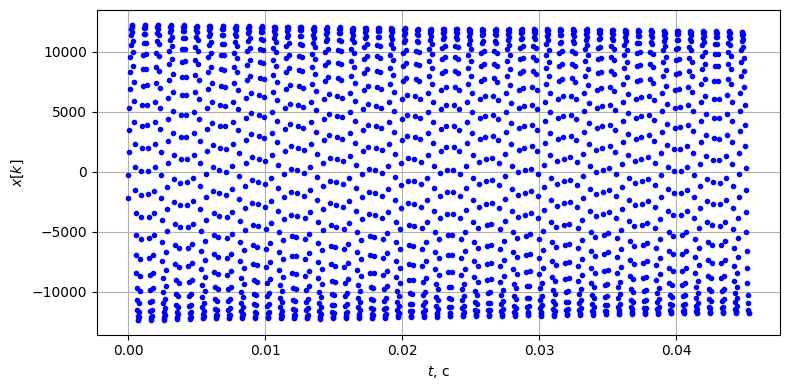

In [14]:
x1=x[8000:10000]                     # выбор наблюдаемого диапазона
k=np.arange(x1.size)               # отсчеты по времени
# Построение графиков 
plt.figure(figsize=[8, 4])         # создание полотна размером шириной 8 X 4 дюйма
plt.plot(k/fs, x1, 'b.')           # построение графика цифрового сигнала точками точками
plt.grid()                             
plt.xlabel("$t$, c")                      
plt.ylabel("$x[k]$")             
plt.tight_layout()

# Занятие 2. Спектры импульсных и периодических сигналов.

## Задача 2.1. Спектры симметричных оконных функций

|  Варианты:  |  1  |  2  |   3  |   4  |  5  |   6  |  7  |   8  |   9  |  10 |  11  |  12  |
|:-----------:|:---:|:---:|:----:|:----:|:---:|:----:|:---:|:----:|:----:|:---:|:----:|:----:|
| $\tau$**, мкс** | 100 | 500 | 1000 | 5000 | 400 | 2000 | 300 | 1500 | 3000 | 800 | 3500 | 4000 |


Ниже приведен пример вычисления модуля спектральной плотности $|X(f)|$ для прямоугольного окна длительностью $\tau=150$ мкс. 

Для заданного параметра $\tau$ из таблицы, построить графики модуля спектральной плотности $|X(f)|$ для прямоугольного окна, 
$$w_b(t)=\left\{ \begin{matrix}
   1, & \text{ }\text{если }|t|\le \tau /2,  \\
   0, & \text{ }\text{если }|t|>\tau /2; \\
\end{matrix} \right.$$

$$W_b(f) = \tau \frac{sin(\pi f \tau)}{\pi f \tau}$$

треугольного окна
$$w_t(t)=\left\{ \begin{matrix}
   1-\dfrac{|t|}{\tau /2}, & \text{ }\text{если }|t|\le \tau /2,  \\
   0, & \text{ }\text{если }|t|>\tau /2.  \\
\end{matrix} \right.$$

$$ W_t(f) = \frac{\tau}{2} \frac{sin^2(\pi f \tau / 2)}{(\pi f \tau)^2}$$

 и окна Ханна
$$w_H(t)=\left\{ \begin{matrix}
   \dfrac{1}{2}\left( 1+\cos \left( 2\pi \dfrac{t}{\tau } \right) \right), & \text{ }\text{если }|t|\le \tau /2,  \\
   0, & \text{ }\text{если }|t|>\tau /2.  \\
\end{matrix} \right.$$

$$ W_H(f) = \frac{\tau}{2} \frac{sin(\pi f \tau)}{\pi f \tau} \frac{1}{1 - \tau^2 f^2}$$



Привести аналитические формулы спектральной плотности для этих импульсов. 
Определить 
* а) уровни первого бокового лепестка относительно главного в $|X(f)|$ (практич.) в дБ ($20\lg  \left|\dfrac{X(f)}{X(0)}\right| $ ),
* б) расположение нулей $|X(f)|$ (практич. и теоретическое).

Заполнить таблицу для трех окон.

| Окна  |   Уровень первого бокового лепестка относительно главного, дБ  |  Ширина главного лепестка, Гц  |
|:-----------:|:---:|:---:|
| прямоугольное |   -13  |   333    |
| треугольное |   -27  |   667    |
| Ханна |  -31   |   667    |


In [15]:
MY_TAU = 3e-3

# Config:
# func: t-function func(x, tau)
# spectrum: spectrum function spectrum(x, tau)
# tau - parameter
# band - frequency band (in 1/tau units)
# maxpoint - first extremum (in 1/tau units)
# zeropoint - first zero (in 1/tau units)
# maxlevel - level at f = 0 (in tau units)
# title - general title

def vectorized(X, func, tau):
    return np.array([func(x, tau) for x in np.array(X)])

def plot2(conf):
    tau = conf["tau"]
    title = conf["title"]
    f_band = conf["band"] / tau

    T = np.linspace(-tau, tau, 1024)
    F = np.linspace(0, f_band, 1024)

    # Draw function
    plt.plot(T, vectorized(T, conf["func"], tau))
    plt.xticks([0, -tau/2, tau/2], ["$0$", "$-\\frac{\\tau}{2}$", "$\\frac{\\tau}{2}$"])
    plt.yticks([0, 1])
    plt.grid()
    plt.xlabel("$t$")
    plt.ylabel("$x(t)$")
    plt.title(f"${title}$")
    plt.show()

    # Draw analytical spectrum
    maxpoint = conf["maxpoint"] / tau
    maxpoint_label = "$\\frac{" + str(conf["maxpoint"]) + "}{\\tau}$"

    maxlevel = conf["maxlevel"] * tau
    maxlevel_label = "$" +str(conf["maxlevel"]) + "\\tau$"

    maxpoint_val = abs(conf["spectrum"](maxpoint, tau))

    dbs = round(20 * np.log10(maxpoint_val / maxlevel))
    maxpoint_val_label = "$" +str(round(maxpoint_val / tau, 3)) + "\\tau$" + f"$({dbs} dB)$"

    zeropoint = conf["zeropoint"] / tau
    zeropoint_label = "$\\frac{" + str(conf["zeropoint"]) + "}{\\tau}$"

    plt.plot(F, np.abs(vectorized(F, conf["spectrum"], tau)), "r--", label="$Аналитический$")
    plt.xticks([0, maxpoint, zeropoint], ["0", maxpoint_label, zeropoint_label + f"$({round(zeropoint)} Гц)$"])
    plt.yticks([0, maxlevel, maxpoint_val], ["0", maxlevel_label, maxpoint_val_label])
    
    # draw calculated spectrum
    Y = fourier_transform(signal=conf["func"], f_band=F, tau=tau, t1=-tau/2, t2=tau/2, res_type="abs")
    plt.plot(F, Y, zorder=0, label="$Расчитанный$")
    
    plt.grid()
    plt.xlabel("$f$")
    plt.ylabel("$X(f)$")
    plt.title(f"${title}: спектр$")
    plt.legend()
    plt.show()

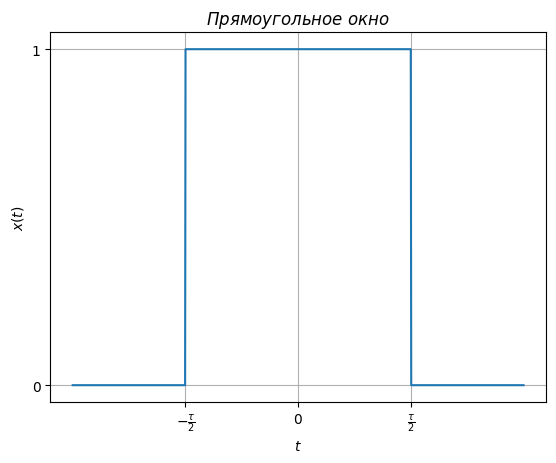

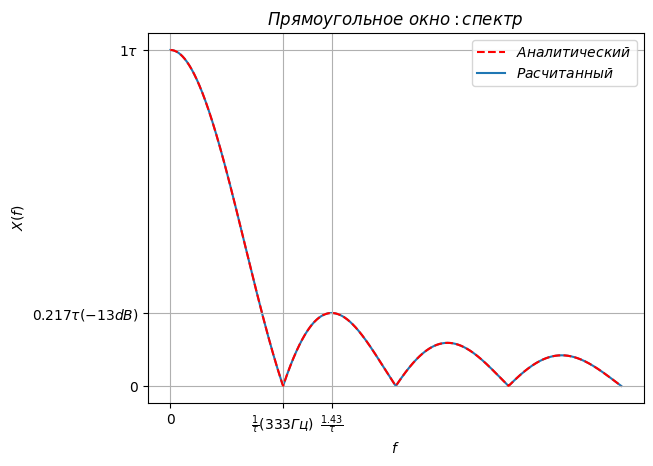

In [16]:
def boxcar(t, tau):
    if abs(t)<tau/2:
        return 1.0                 
    else:
        return 0.0                

def boxcar_spectrum(f, tau):
    if (f == 0): return tau
    return tau * np.sin(np.pi * f * tau) / (np.pi * f * tau)


conf = dict()
conf["func"] = boxcar
conf["spectrum"] = boxcar_spectrum
conf["tau"] = MY_TAU
conf["band"] = 4
conf["maxpoint"] = 1.43
conf["zeropoint"] = 1
conf["maxlevel"] = 1
conf["title"] = "Прямоугольное~ окно"

plot2(conf)

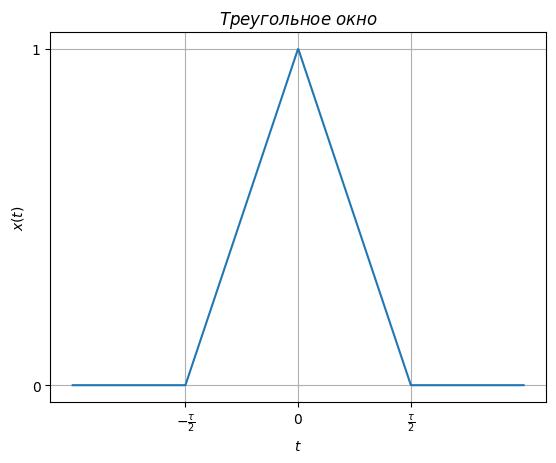

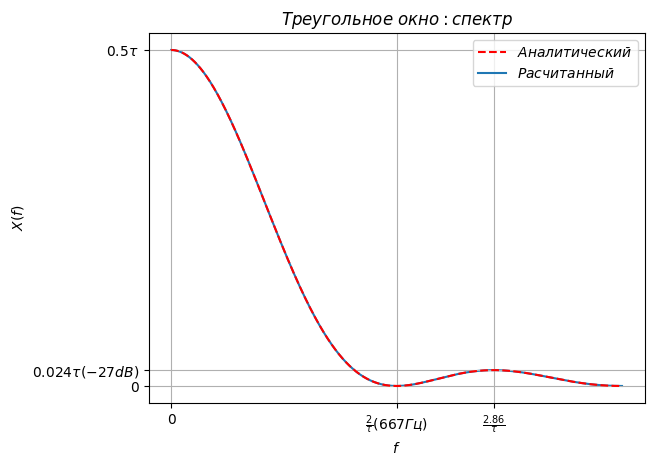

In [17]:
def triangle(t, tau):
    if abs(t)<tau/2:
        return 1.0 - 2 * np.abs(t) / tau
    else:
        return 0.0                

def triangle_spectrum(f, tau):
    if (f == 0): return tau / 2
    return (tau / 2) * (np.sin(np.pi * f * tau / 2) / (np.pi * f * tau / 2))**2


conf = dict()
conf["func"] = triangle
conf["spectrum"] = triangle_spectrum
conf["tau"] = MY_TAU
conf["band"] = 4
conf["maxpoint"] = 2.86
conf["zeropoint"] = 2
conf["maxlevel"] = 0.5
conf["title"] = "Треугольное~ окно"

plot2(conf)

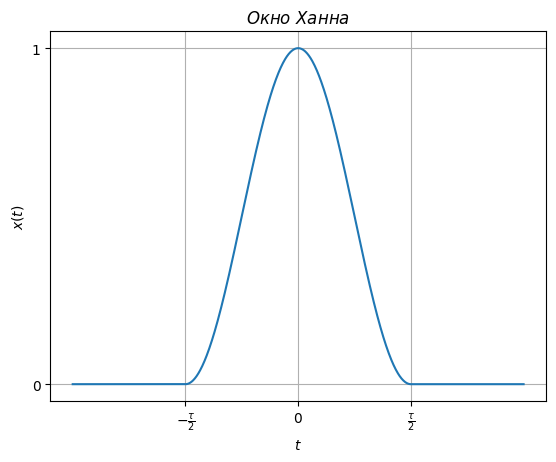

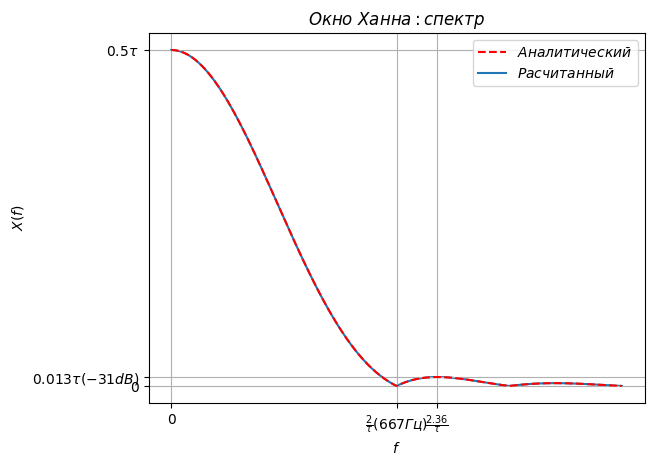

In [18]:
def hann(t, tau):
    if abs(t)<tau/2:
        return (1 + np.cos(2 * np.pi * t / tau)) / 2
    else:
        return 0.0                

def hann_spectrum(f, tau):
    if (f == 0): return tau / 2
    return (tau / 2) * (np.sin(np.pi * f * tau) / (np.pi * f * tau)) / (1 - (tau * f)**2)


conf = dict()
conf["func"] = hann
conf["spectrum"] = hann_spectrum
conf["tau"] = MY_TAU
conf["band"] = 4
conf["maxpoint"] = 2.36
conf["zeropoint"] = 2
conf["maxlevel"] = 0.5
conf["title"] = "Окно ~Ханна"

plot2(conf)

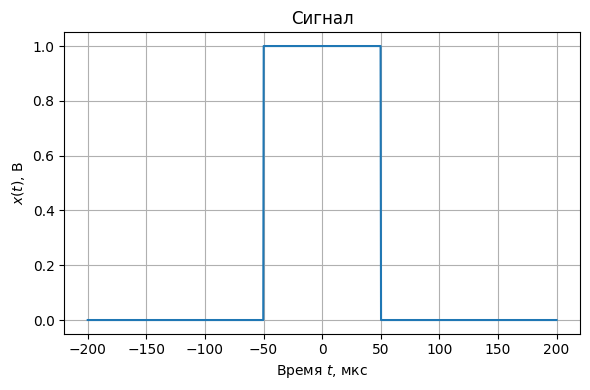

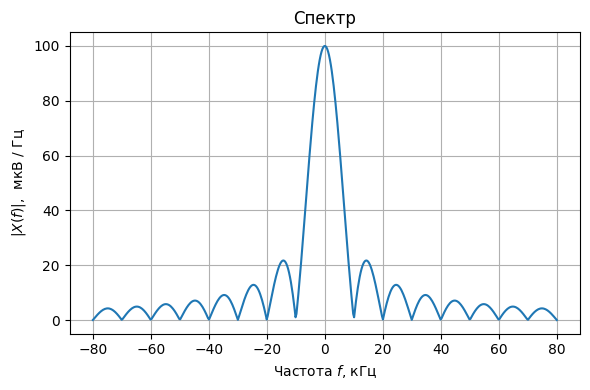

In [19]:
tau=100e-6 #100 мкс

f_band=np.linspace(-8/tau, 8/tau, 500) # 500 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if abs(t)<tau/2:
        return 1.0                 
    else:
        return 0.0                 
    
t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[6, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время $t$, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[6, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-tau/2, t2=tau/2, res_type="abs")*1e6)
plt.xlabel("Частота $f$, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр")
plt.tight_layout() 
plt.grid()

## Задача 2.2. Теорема запаздывания для преобразования Фурье

|  Варианты:  |  1  |  2  |   3  |   4  |  5  |   6  |  7  |   8  |   9  |  10 |  11  |  12  |
|:-----------:|:---:|:---:|:----:|:----:|:---:|:----:|:---:|:----:|:----:|:---:|:----:|:----:|
|     **E, В**    | 0.1 | 0.5 |   1  |   5  |  1  |   5  | 0.5 |  2.5 |   6  | 1.6 |   7  |   8  |
| **$\tau$, мкс** | 100 | 500 | 1000 | 5000 | 400 | 2000 | 300 | 1500 | 3000 | 800 | 3500 | 4000 |

Ниже приведен пример вычисления спектральной плотности для несимметричного прямоугольного импульса амплитудой $E=0.1$ В, длительностью $\tau=100$ мкс. В данном случае импульс начинается в начале отсчета оси времени. 

Для заданных параметров $E$ и $\tau$ из таблицы, построить и сравнить графики $\text{Re} X(f)$, $\text{Im} X(f)$, $|X(f)|$ для прямоугольного импульса, начинающегося в моменты времени $-\tau /2$ и $0$. Как согласуются результаты с теоремой запаздывания для преобразования Фурье?


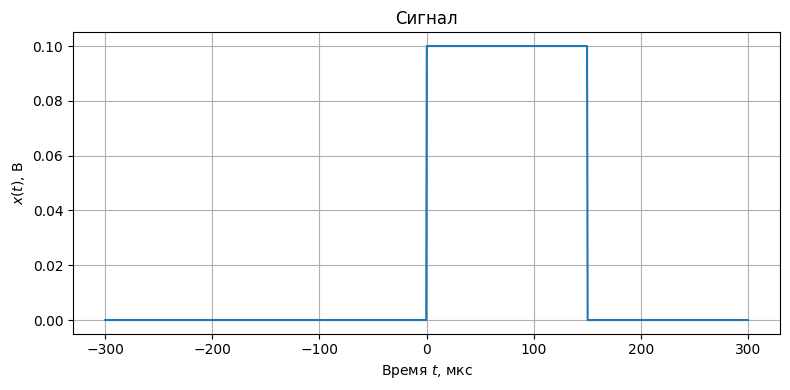

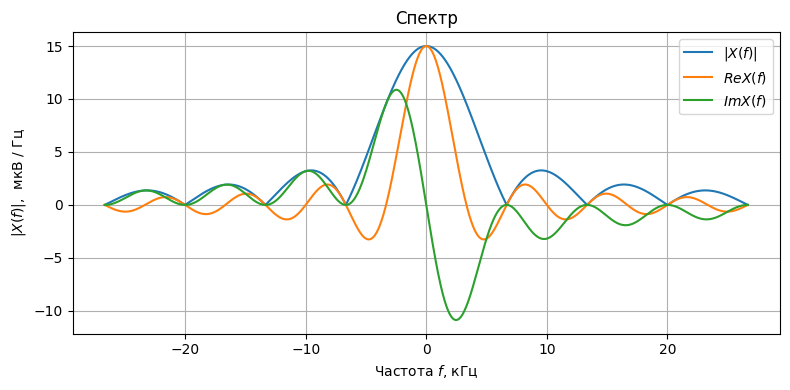

In [20]:
tau=150*1e-6 #150 мкс

f_band=np.linspace(-4/tau, 4/tau, 1000) # 1000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if 0<t<tau:
        return 0.1 # 0.1 В
    else:
        return 0.0 # 0 В
    
t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время $t$, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6, label='$|X(f)|$')
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Re")*1e6, label='${Re }X(f)$')
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Im")*1e6, label='${Im }X(f)$')
plt.xlabel("Частота $f$, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр")
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.grid()

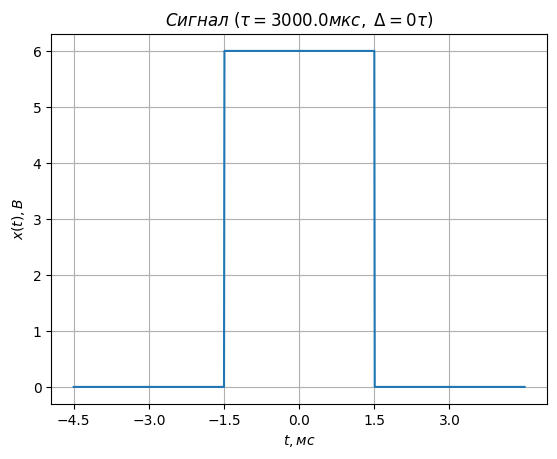

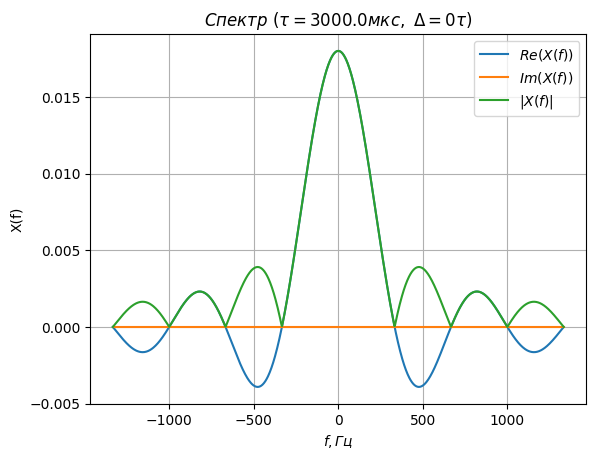

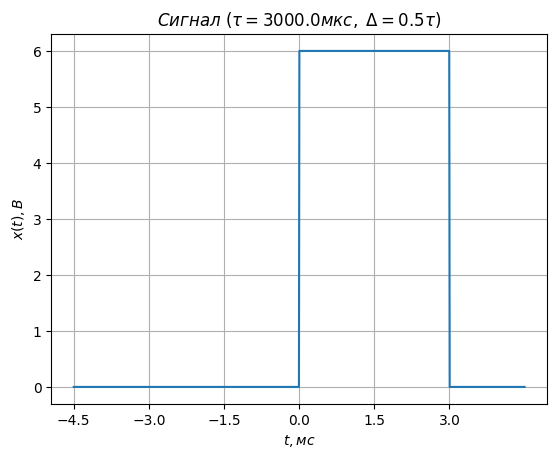

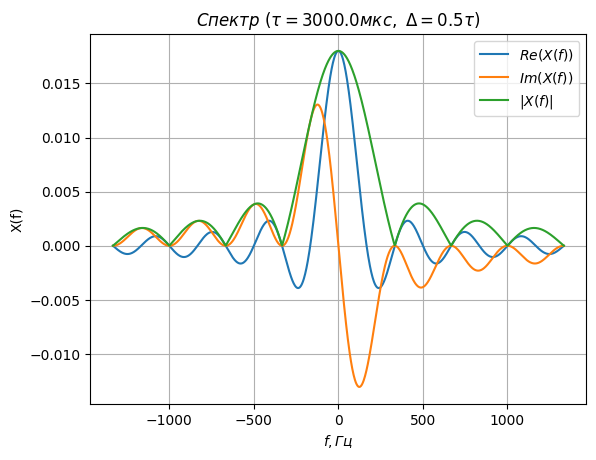

In [21]:
MY_TAU = 3e-3
MY_E = 6

def boxcar(t, _=None):
    if abs(t) < MY_TAU / 2:
        return MY_E
    else:
        return .0

def vectorize(func, T):
    return np.array([func(t) for t in T])

def plot_offseted(func, offset):
    tau = MY_TAU
    T = np.linspace(-1.5*tau, 1.5*tau, 1024)

    offset_func = lambda t, _=None: func(t - offset*tau)

    plt.plot(1e3*T, vectorize(offset_func, T))
    plt.xticks(np.arange(1e3*-1.5*tau, 1e3*1.5*tau, 1e3*0.5*tau))
    plt.xlabel("$t, мc$")
    plt.ylabel("$x(t), В$")
    plt.title(f"$Сигнал ~(\\tau = {MY_TAU * 1e6}мкс,~ \Delta = {offset} \\tau)$")
    plt.grid()
    plt.show()

    F = np.linspace(-4/tau, 4/tau, 1024)

    Re = fourier_transform(signal=offset_func, f_band=F, tau=MY_TAU, t1=-2*tau, t2=2*tau, res_type="Re")
    Im = fourier_transform(signal=offset_func, f_band=F, tau=MY_TAU, t1=-2*tau, t2=2*tau, res_type="Im")
    Abs = fourier_transform(signal=offset_func, f_band=F, tau=MY_TAU, t1=-2*tau, t2=2*tau, res_type="abs")

    plt.plot(F, Re, label = "$Re(X(f))$")
    plt.plot(F, Im, label = "$Im(X(f))$")
    plt.plot(F, Abs, label = "$|X(f)|$")
    plt.xlabel("$f, Гц$")
    plt.ylabel("X(f)")
    plt.grid()
    plt.legend()
    plt.title(f"$Спектр ~(\\tau = {MY_TAU * 1e6}мкс,~ \Delta = {offset} \\tau)$")
    plt.show()


plot_offseted(boxcar, 0)
plot_offseted(boxcar, 1/2)

В случае смещения $\Delta = \tau/2$ из теоремы о запаздывании можно вывести

$$ |X(f)| = E \tau |\frac{sin(\pi f \tau)}{\pi f \tau}|$$
$$ Re~X(f) = E \tau \frac{sin(2 \pi f \tau)}{2 \pi f \tau}$$
$$ Im~X(f) = -E \tau \frac{sin^2(\pi f \tau)}{\pi f \tau}$$

Что согласуется с полученными графиками.

## Задача 2.3. Спектр отрезка синусоиды

|  Варианты:  |  1  |  2  |  3  |  4  |  5  |  6 |  7  |  8  |  9  | 10 |  11 |  12 |
|:-----------:|:---:|:---:|:---:|:---:|:---:|:--:|:---:|:---:|:---:|:--:|:---:|:---:|
|  $f_0$**, кГц** |  10 | 100 |  60 |  40 |  65 | 90 |  30 |  20 |  55 | 75 |  35 |  50 |
| $\tau$**, мкс** | 500 | 50  | 100 | 125 | 100 | 55 | 200 | 225 | 109 | 60 | 171 | 100 |

Ниже приведен пример вычисления спектральной плотности для отрезка синусоиды $x(t)=\sin(2\pi f_0 t)$ c частотой $f_0=10$ кГц длительностью  $\tau=500$  мкс. 

Для заданных параметров  $f_0$  и  $\tau$  из таблицы, построить $|X(f)|$ для отрезка синусоиды $x(t)=\sin(2\pi f_0 t)$ c частотой $f_0$ длительностью  $\tau$. 

1) Сравнить положение главных спектральных максимумов с частотой синусоиды. 

2) Повторить вычисления для отрезка синусоиды, взвешанного окном Ханна соотвествующей длины. Сравнить ширину главного лепестка на нулевом уровне и значение  $|X(f)|$ на частоте $f_0$ для сигнала $x(t)$, взвешанного прямоугольным окном и окном Ханна.

3) Сравнить спектр периодического сигнала  $x(t)=\sin(2\pi f_0 t)$ с получившимися графиками. 

## Прямоугольное окно

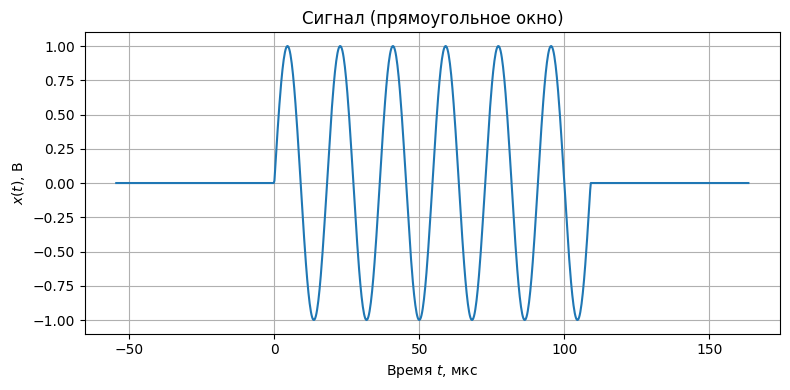

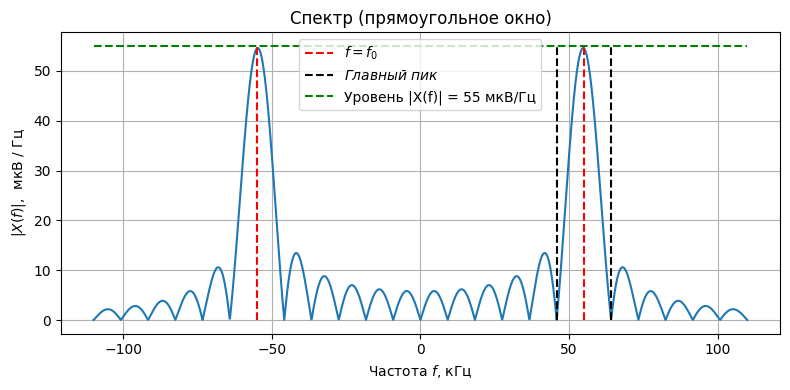

In [22]:
# Вариант 9

f0=55*1e3       # 55 кГц
tau=109*1e-6    # 109 мкс

def sin_with_boxcar(t, tau):                            
    if 0<=t<=tau:
        # случай прямоугольного окна
        return np.sin(2*np.pi*f0*t) 
    else:
        return 0.0
    
f_band=np.linspace(-2*f0, 2*f0, 2000) 

t_band=np.linspace(-0.5*tau, 1.5*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [sin_with_boxcar(t, tau) for t in t_band])
plt.title("Сигнал (прямоугольное окно)")
plt.xlabel("Время $t$, мкс")
plt.ylabel("$x(t)$, В")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=sin_with_boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6)
plt.title("Спектр (прямоугольное окно)")
plt.xlabel("Частота $f$, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout() 
plt.grid()

plt.vlines([-f0*1e-3, f0*1e-3], 0, 55, linestyles="dashed", colors=["r", "r"], label="$f=f_0$")
plt.vlines([f0*1e-3 + 1e-3/tau, f0*1e-3 - 1e-3/tau], 0, 55, linestyles="dashed", colors=["k", "k"], label="$Главный ~пик$")
plt.hlines(55, -2e-3*f0, 2e-3*f0, "g", "dashed", label="Уровень |X(f)| = 55 мкВ/Гц")
plt.legend()

> Главные спектральные максимумы находятся на $f= \pm f_0 = \pm 55кГц$

> Ширина главных спектральных максимумов по нулевому уровню равняется $\Delta = \frac{1}{\tau} = 9.2 кГц$

> Высота главного пика составляет $|X( \pm f_0)| = E\tau = 55 мкВ/Гц$

## Окно Ханна

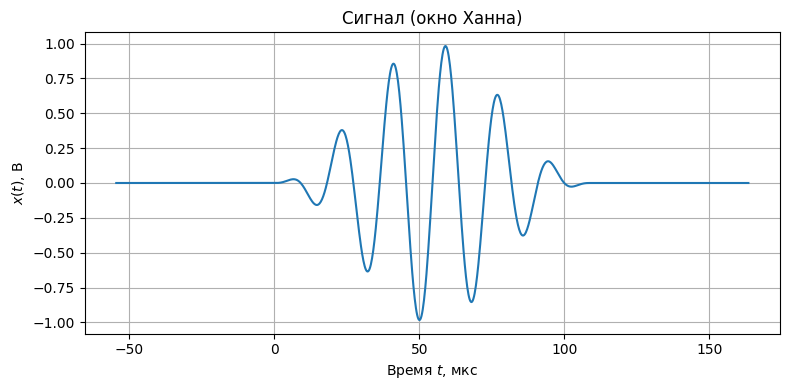

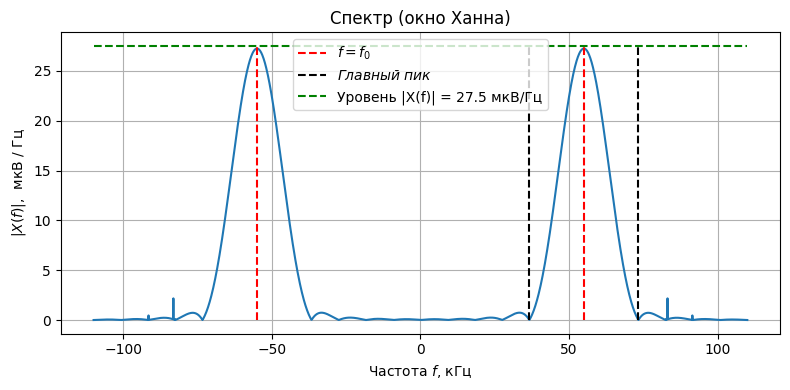

In [23]:
# Вариант 9

f0=55*1e3       # 55 кГц
tau=109*1e-6    # 109 мкс

def sin_with_boxcar(t, tau):                            
    if 0<=t<=tau:
        return np.sin(2*np.pi*f0*t) * (0.5+0.5*np.cos(np.pi*(t-tau/2)/(tau/2)))
    else:
        return 0.0
    
f_band=np.linspace(-2*f0, 2*f0, 2000) 

t_band=np.linspace(-0.5*tau, 1.5*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [sin_with_boxcar(t, tau) for t in t_band])
plt.title("Сигнал (окно Ханна)")
plt.xlabel("Время $t$, мкс")
plt.ylabel("$x(t)$, В")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=sin_with_boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6)
plt.title("Спектр (окно Ханна)")
plt.xlabel("Частота $f$, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout() 
plt.grid()

plt.vlines([-f0*1e-3, f0*1e-3], 0, 55 / 2, linestyles="dashed", colors=["r", "r"], label="$f=f_0$")
plt.vlines([f0*1e-3 + 2e-3/tau, f0*1e-3 - 2e-3/tau], 0, 55/2, linestyles="dashed", colors=["k", "k"], label="$Главный ~пик$")
plt.hlines(55/2, -2e-3*f0, 2e-3*f0, "g", "dashed", label="Уровень |X(f)| = 27.5 мкВ/Гц")
plt.legend()

> Главные спектральные максимумы находятся на $f= \pm f_0 = \pm 55кГц$
  
> Ширина главных спектральных максимумов по нулевому уровню равняется $\Delta = \frac{2}{\tau} = 18.3 кГц$

> Высота главного пика составляет $|X( \pm f_0)| = \frac{E\tau}{2} = 27.5 мкВ/Гц$

## Просто синус

C:\Users\Vladimir\AppData\Local\Temp\ipykernel_4356\1525074502.py:25: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
C:\Users\Vladimir\AppData\Local\Temp\ipykernel_4356\1525074502.py:25: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])


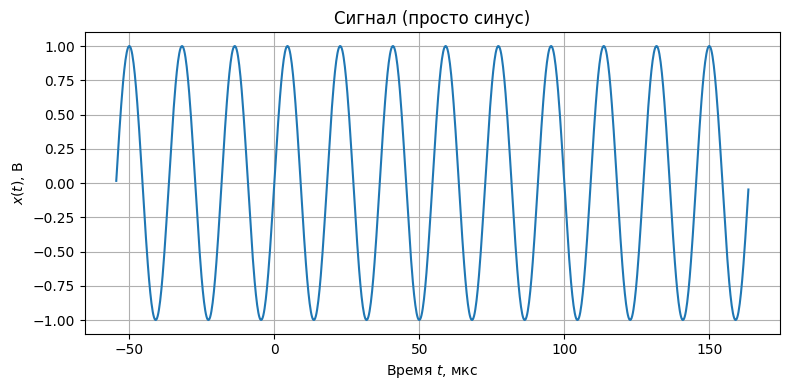

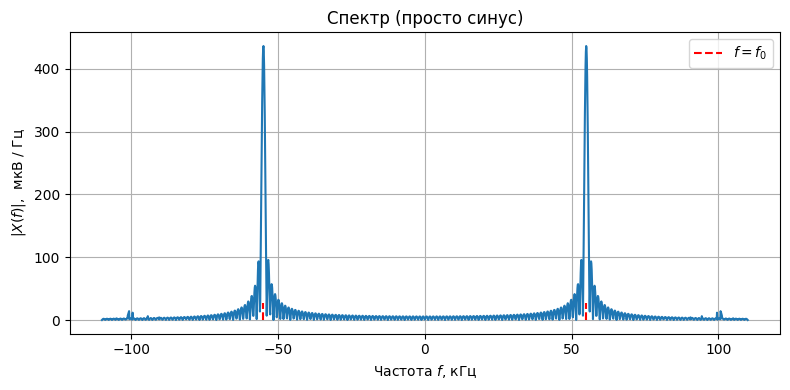

In [24]:
# Вариант 9

f0=55*1e3       # 55 кГц
tau=109*1e-6    # 109 мкс

def sin_with_boxcar(t, tau):                            
    return np.sin(2*np.pi*f0*t)
    
f_band=np.linspace(-2*f0, 2*f0, 2000) 

t_band=np.linspace(-0.5*tau, 1.5*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [sin_with_boxcar(t, tau) for t in t_band])
plt.title("Сигнал (просто синус)")
plt.xlabel("Время $t$, мкс")
plt.ylabel("$x(t)$, В")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=sin_with_boxcar, f_band=f_band, tau=tau, t1=-4*tau, t2=4*tau, res_type="abs")*1e6)
plt.title("Спектр (просто синус)")
plt.xlabel("Частота $f$, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout() 
plt.grid()

plt.vlines([-f0*1e-3, f0*1e-3], 0, 55 / 2, linestyles="dashed", colors=["r", "r"], label="$f=f_0$")
plt.legend()

> Спектр сходится к cумме дельта функций $|X(f)| \propto \delta(f + f_0) + \delta(f - f_0)$

> Численно спектр расходится

## Задача 2.4. Спектр пачки равноотстоящих импульсов

|    Варианты:    |  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  |  10 |  11 |  12 |
|:---------------:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|        N        |  3  |  4  |  3  |  4  |  3  |  4  |  3  |  4  |  3  |  4  |  3  |  4  |
| $\tau$**, мкс**     | 300 | 50  | 100 | 125 | 250 | 60  | 200 | 400 | 500 | 150 | 450 | 100 |
| $T_{period}$**, мкс** | 600 | 125 | 200 | 275 | 500 | 100 | 400 | 700 | 800 | 300 | 810 | 200 |

Ниже приведен пример вычисления спектр пачки из $N=4$ равноотстоящих импульсов длительностью $\tau = 100$ мкс с периодом повторения $T_{period}=400$ мкс.

Повторить вычисления для заданных значений $N$, $\tau$, $T_{period}$. Сравнить получившийся график с аналитическим выражением для спектра.

Аналитическое выражение:

$$ |X(f)| = E \tau |\frac{sin(\pi \tau f)}{\pi \tau f} \frac{sin(\pi N T f)}{sin(\pi T f)}|$$


C:\Users\Vladimir\AppData\Local\Temp\ipykernel_4356\1525074502.py:24: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
C:\Users\Vladimir\AppData\Local\Temp\ipykernel_4356\1525074502.py:25: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])


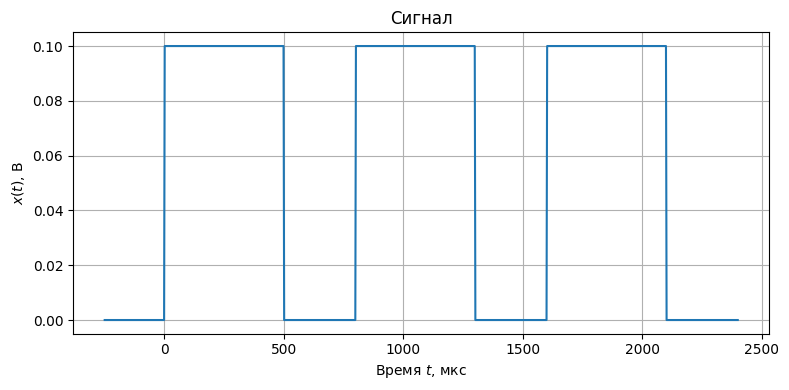

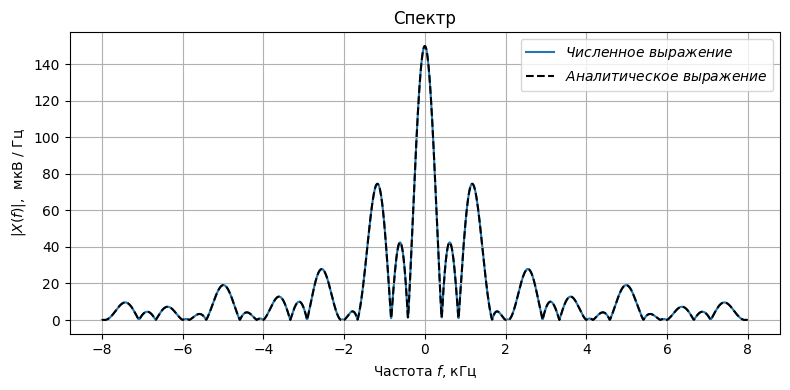

In [42]:
# Вариант 9

N=3
tau=500e-6 #100 мкс
period = 800e-6
T = period
E = 0.1

f_band=np.linspace(-4/tau, 4/tau, 2000) # 2000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    
    for n in range(N):
        tau0 = period * n
        tau1 = tau + period * n
        if tau0 < t < tau1:
            return E # 0.1 В
    return 0.0 # 0 В

def analytical_spectrum(f):
    from numpy import pi, sin
    if (f == 0): return tau * N * E
    return tau * E * sin(pi * f * tau) * sin(pi * N * T * f) / (pi * tau * f * sin(pi * T * f))

t_band=np.linspace(-0.5*tau, N*period, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время $t$, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=0, t2=N*period, res_type="abs")*1e6, zorder=0, label="$Численное~ выражение$")
plt.plot(f_band/1e3, [abs(analytical_spectrum(f)*1e6) for f in f_band], "k--", label="$Аналитическое~ выражение$")
plt.title("Спектр")
plt.xlabel("Частота $f$, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout() 
plt.grid()
plt.legend()

> Как мы видим, численное и аналитическое выражения спектров совпадают

# Занятие 3. Эффект наложения спектров при дискретизации сигналов.

## Задача 3.1. Эффект наложения при дискретизации прямоугольного импульса

|  Варианты:  |  1  |  2  |   3  |   4  |  5  |   6  |  7  |   8  |   9  |  10 |  11  |  12  |
|:-----------:|:---:|:---:|:----:|:----:|:---:|:----:|:---:|:----:|:----:|:---:|:----:|:----:|
| $\tau$**, мкс** | 100 | 500 | 1000 | 5000 | 400 | 2000 | 300 | 1500 | 3000 | 800 | 3500 | 4000 |


Рассмотреть прямоугольный импульс длительностью $1.05\tau$. Дискретизовать его с частотой $f_s  = 10/ \tau $.  Построить спектр прямоугольного импульса и полученного дискретизованного сигнала. 

Пронаблюдать наложение спектра при дискретизации. 

Найти сигнал,  который дискретизуется такой же последовательностью, как и прямоугольный импульс, но при этом не наблюдается эффект наложения (сигнал, который восстанавливается с помощью интерполяционного ряда Котельникова).

In [26]:
def DTFT_abs3(xk, fs, M=2048):
    res=abs(np.fft.fftshift(np.fft.fft(xk, M)))
    return fs*np.arange(-1.5, 1.5, 1/M), np.hstack((res, res, res)) 

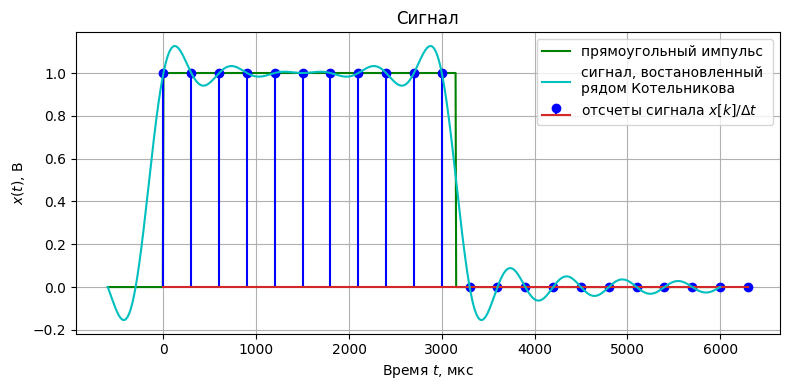

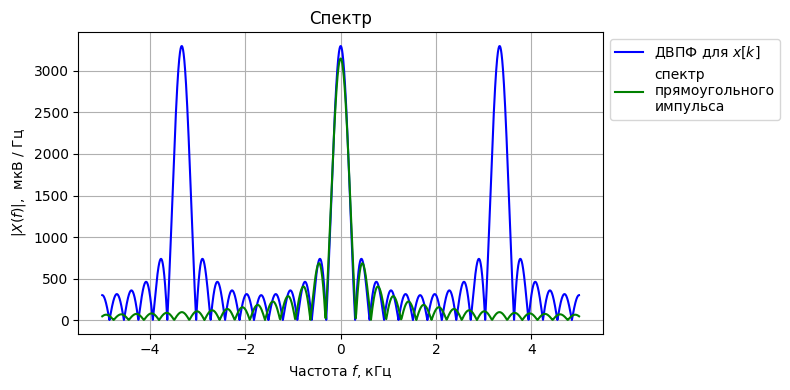

In [ ]:
# Вариант 9

tau=3*1e-3 #3 мс
fs=10/tau

f_band=np.linspace(-1.5*fs, 1.5*fs, 1000) # 1000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if 0 <= t <= 1.05*tau:
        return 1.0 
    elif np.isclose(t, 1.05*tau, atol=1e-12) or np.isclose(t, 0, atol=1e-12):
        return 1.0 
    else:
        return 0.0 

def sinc_phi(t, k, fs):
    dt=1/fs
    if np.isclose(0, t-k*dt):
        return 1.0
    else:
        return np.sin(np.pi*fs*(t-k*dt))/(np.pi*fs*(t-k*dt))
    
def sinc_interp(t, xk):
    return sum([xk[k]*fs*sinc_phi(t, k, fs) for k in range(len(xk))])

tk = np.arange(0, 2*tau+1.0/fs, 1.0/fs, dtype=float)
xk = np.array([(1/fs)*boxcar(tk1, tau) for tk1 in tk])
    
t_band=np.linspace(-0.2*tau, 2*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band], 'g', label='прямоугольный импульс')
plt.stem(tk*1e6, xk*fs, linefmt='b', markerfmt='bo', label='отсчеты сигнала $x[k]/{\\Delta t}$')



plt.plot(t_band*1e6, np.array([sinc_interp(t, xk) for t in t_band]), 'c', label='сигнал, востановленный \nрядом Котельникова')

plt.title("Сигнал")
plt.xlabel("Время $t$, мкс")
plt.ylabel("$x(t)$, В")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 

plt.figure(figsize=[8, 4])


DTFT_plot=DTFT_abs3(xk, fs)
plt.plot(DTFT_plot[0]/1e3, DTFT_plot[1]*1e6, 'b', label='ДВПФ для $x[k]$')

plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6, 
         'g', label='спектр\nпрямоугольного\nимпульса')

plt.title("Спектр")
plt.xlabel("Частота $f$, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 

Спектры действительно накладываются.

Сигнал, восстановленный интерполяционным рядом Котельникова, имеет вид

$ x(t) = \Sigma_{k=-\infty}^{\infty} x(\frac{k}{f_s} sinc(\pi f_s (t - \frac{k}{f_s}))) $

В нашем случае $f_s = \frac{10}{\tau}$

$x(t) = \Sigma_{k=0}^{10} sinc (\frac{10 \pi}{\tau}(t - \frac{k\tau}{10}))$

## Задача 3.2. Эффект наложения при прореживании сигнала

| Варианты: | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  | 10 | 11 | 12 |
|:---------:|----|----|----|----|----|----|----|----|----|----|----|----|
| $K_1$     | 35 | 10 | 20 | 25 | 15 | 40 | 20 | 15 | 40 | 35 | 10 | 25 |
| $K_2$     | 70 | 60 | 65 | 80 | 75 | 90 | 85 | 60 | 95 | 80 | 70 | 75 |


Выполнить прореживание (downsampling) сигнала камертона из файла `tuning-fork.wav` (основная частота сигнала 440 Гц, частота дискретизации 44100 Гц) без предварительной фильтрации, оставляя в одном случае каждый $K_1$-ый, а в другом каждый $K_2$-ый отсчет сигнала. В чем принципиальное отличие между спектрами получившихся сигналов и какими эффектами оно обусловлено? 

In [44]:
def DTFT_abs(xk, fs, M=2**17):
    res=abs(np.fft.fftshift(np.fft.fft(xk, M)))
    return fs*np.arange(-0.5, 0.5, 1/M), np.hstack((res)) 

(-50.0, 50.0)

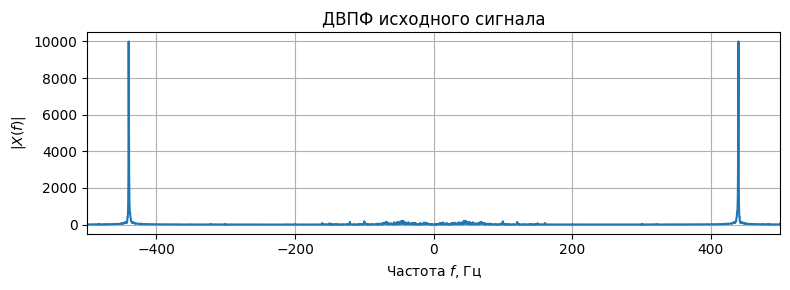

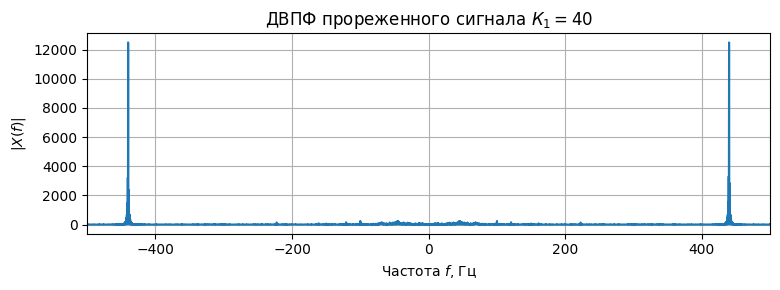

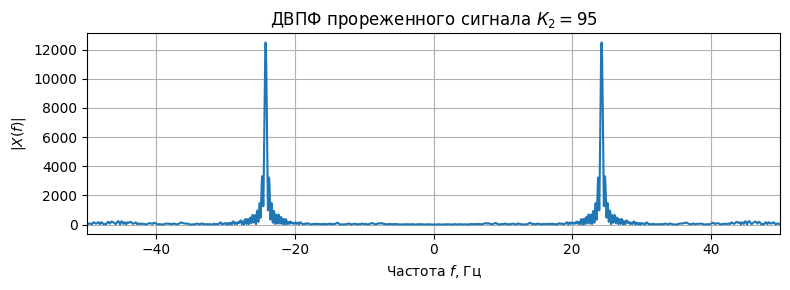

In [67]:
fs, x=scipy.io.wavfile.read('tuning-fork.wav')
#for mono channel 
#x=x[:,1] 

plt.figure(figsize=[8, 3], dpi=100)

DTFT_plot=DTFT_abs(x/fs, fs)

plt.plot(DTFT_plot[0], DTFT_plot[1])
plt.grid()
plt.title("ДВПФ исходного сигнала")
plt.xlabel("Частота $f$, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout()
plt.xlim(-500, 500)

# downsampling
plt.figure(figsize=[8, 3], dpi=100)
K1=40
y=x[::K1]
DTFT_plot=DTFT_abs(y/(fs/K1), fs/K1)
plt.plot(DTFT_plot[0], DTFT_plot[1])
plt.grid()
plt.title("ДВПФ прореженного сигнала $К_1=$%i" %K1)
plt.xlabel("Частота $f$, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout() 
plt.xlim(-500, 500)

# downsampling
plt.figure(figsize=[8, 3], dpi=100)
K2=95
y=x[::K2]
    
DTFT_plot=DTFT_abs(y/(fs/K2), fs/K2)
plt.plot(DTFT_plot[0], DTFT_plot[1])
plt.grid()
plt.title("ДВПФ прореженного сигнала $К_2=$%i" %K2)
plt.xlabel("Частота $f$, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout()
plt.xlim(-50, 50)

## Объяснение явления

Без учета гармоник, частота Найквиста для сигнала составит $440 * 2 = 880Hz$

При взятии $K_1 = 40$ частота дискретизации составит $44100 / 40 \approx 1.1 kHz$, так что alising'а не будет

При взятии $K_2 = 95$ частота дискретизации составит $44100 / 95 = 464 Hz$, что сильно меньше частоты Найквиста.
С учетом периодичности спектра, при наложении мы будем наблюдать пики на частоте $464 - 440 = 24Hz$, что совпадает с полученными нами графиками.

> Чтобы не забыть: в коде лабы опечатка, ```DTFT``` записано как ```DFTF```. 